In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

### Dataset Details

**Columns**
* Age
* Operation Year
* Axillary Nodes
* Survival Status

**Column Details**
* **Age** - Age of patient at which they underwent surgery (30 to 80)
* **Operation Year** - Year in which patient was underwent surgery (1958–1969)
* **Axillary Nodes** - Small, bean-shaped organs that act as filters along the lymph fluid channels. As lymph fluid leaves the breast and eventually goes back into the bloodstream, the lymph nodes try to catch and trap cancer cells before they reach other parts of the body. Having cancer cells in the lymph nodes under your arm suggests an increased risk of the cancer spreading.
* **Survival Status** - Patients who survived more than 5 years is represented as **1** and patients who survived less than 5 years is represented as **2**

In [2]:
data = pd.read_csv('haberman.csv', names=['Age', 'Op_year', 'Axil_nodes', 'Surv_status'])
data.head()

,Age,Op_year,Axil_nodes,Surv_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [3]:
data.shape

(306, 4)

In [4]:
data['Surv_status'].value_counts()

1    225
2     81
Name: Surv_status, dtype: int64

### Statistical Description

In [5]:
data.describe()

,Age,Op_year,Axil_nodes,Surv_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


### Pair Plot

/home/praneet/venv/ml_dl/lib/python3.6/site-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


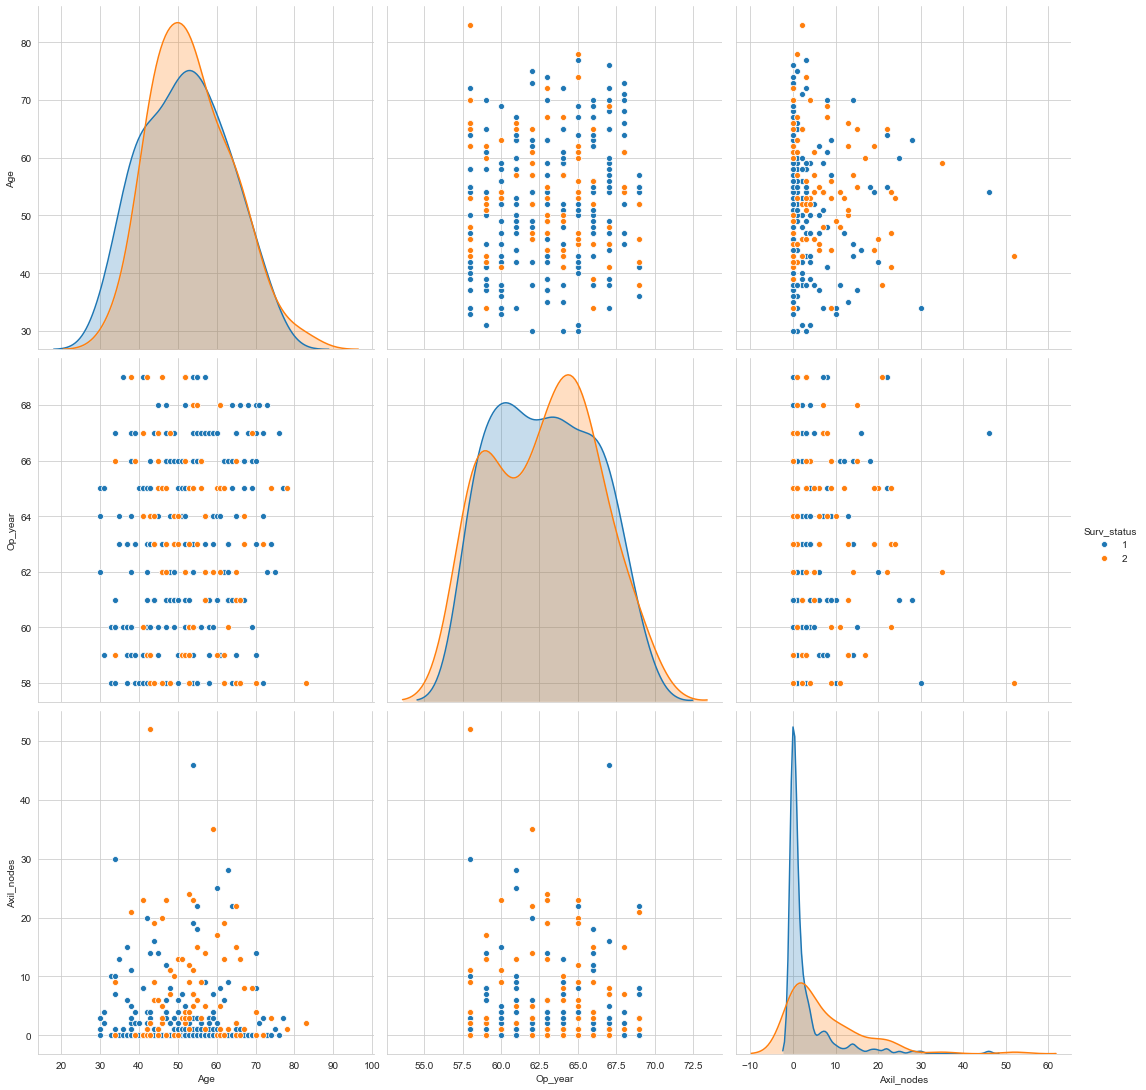

In [6]:
sns.set_style("whitegrid")
sns.pairplot(data, hue='Surv_status', size=5)
plt.show()

### 1D Scatter Plot

Choosing `Axil_nodes` vs `Age` because they are the only ones explainable looking at the pair plot

In [7]:
long_surv_data = data.loc[data['Surv_status'] == 1]
short_surv_data = data.loc[data['Surv_status'] == 2]

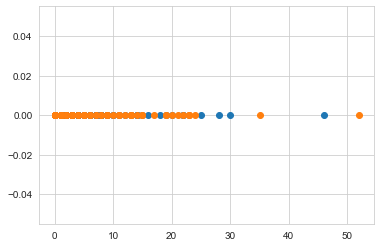

In [8]:
plt.plot(long_surv_data['Axil_nodes'], np.zeros_like(long_surv_data['Axil_nodes']), 'o')
plt.plot(short_surv_data['Axil_nodes'], np.zeros_like(short_surv_data['Axil_nodes']), 'o')
plt.show()

### PDF Plot

#### PDF of `Axil_nodes`

/home/praneet/venv/ml_dl/lib/python3.6/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


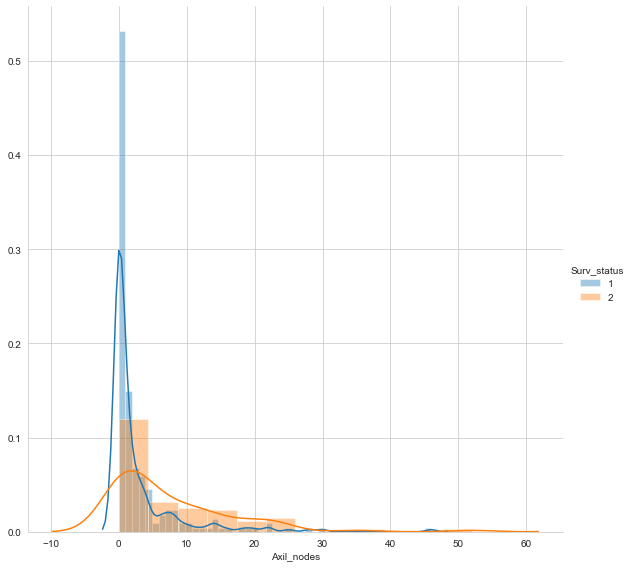

In [9]:
sns.FacetGrid(data, hue='Surv_status', size = 8).map(sns.distplot, 'Axil_nodes').add_legend()

#### PDF of `Age`

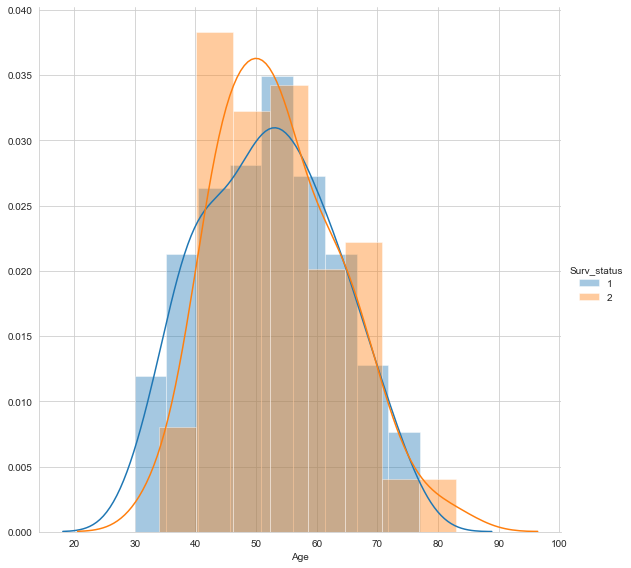

In [10]:
sns.FacetGrid(data, hue='Surv_status', size=8).map(sns.distplot, 'Age').add_legend()

#### PDF of `Op_year`

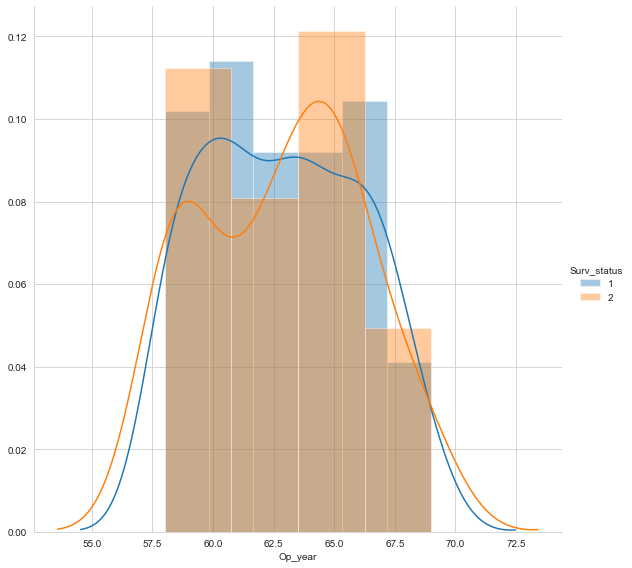

In [11]:
sns.FacetGrid(data, hue='Surv_status', size = 8).map(sns.distplot, 'Op_year').add_legend()

#### Observations from PDF

1. For `Axil_nodes` > 4 patients survive shorter
2. For lesser number of `Axil_nodes` patients survive comparatively longer
3. For `Axil_nodes` between 0 to 4 survival of patients is longer

### CDF of Long Surving Patients

#### CDF of `Axil_nodes` of *Long Surviving Patients*

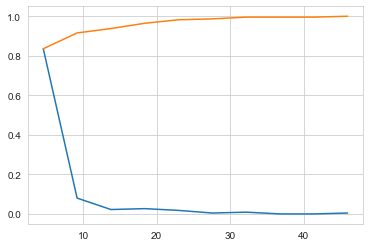

In [12]:
counts, bin_edges = np.histogram(long_surv_data['Axil_nodes'], bins=10, density=True)
pdf = counts / sum(counts)

cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.show()

#### CDF of `Age` of *Long Surviving Patients*

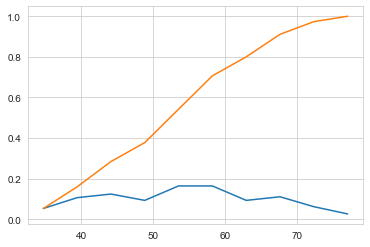

In [13]:
counts, bin_edges = np.histogram(long_surv_data['Age'], bins=10, density=True)
pdf = counts / sum(counts)

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.show()

#### CDF of `Op_year` of *Long Surviving Patients*

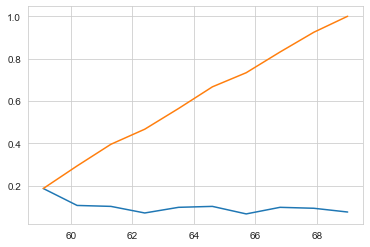

In [14]:
counts, bin_edges = np.histogram(long_surv_data['Op_year'], bins = 10, density=True)
pdf = counts / sum(counts)

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.show()

### CDF of Short Surviving Patients

#### CDF of `Axil_nodes` of *Short Surviving Patients*

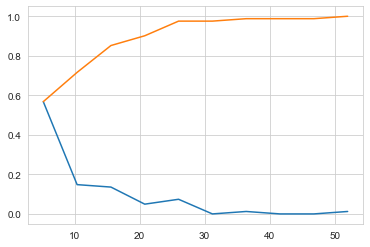

In [15]:
counts, bin_edges = np.histogram(short_surv_data['Axil_nodes'], bins=10, density=True)
pdf = counts / sum(counts)

cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.show()

#### CDF of `Age` of *Short Surviving Patients*

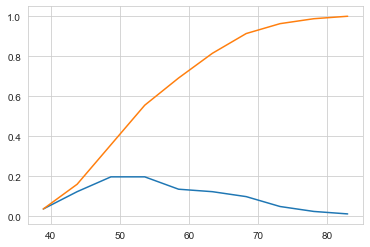

In [16]:
counts, bin_edges = np.histogram(short_surv_data['Age'], bins=10, density=True)
pdf = counts / sum(counts)

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.show()

#### CDF of `Op_year` of *Short Surviving Patients*

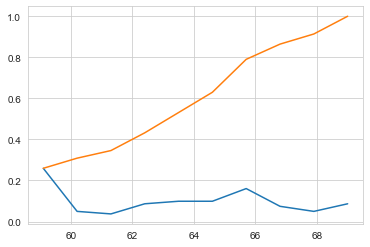

In [17]:
counts, bin_edges = np.histogram(short_surv_data['Op_year'], bins = 10, density=True)
pdf = counts / sum(counts)

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.show()

#### Plotting CDF of `Axil_nodes` of Long and Short Surviving Patients together

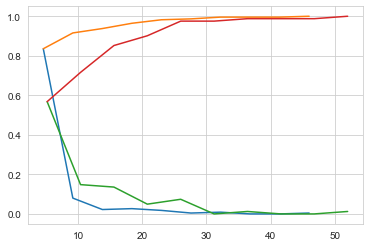

In [18]:
counts, bin_edges = np.histogram(long_surv_data['Axil_nodes'], bins=10, density=True)
pdf = counts / sum(counts)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(short_surv_data['Axil_nodes'], bins=10, density=True)
pdf = counts / sum(counts)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.show()

#### Observations

1. 85% of patients survive if the `Axil_nodes` is less than 5
2. 100% of patients have short survival time if `Axil_nodes` is greater than 40

### Mean, Median, Standard Deviation, Median Absolute Deviation, Quantiles and Percentiles

In [19]:
print('Means')
print('Long Surviving Patient Mean:', np.mean(long_surv_data['Axil_nodes']))
print('Short Surviving Patient Mean:', np.mean(short_surv_data['Axil_nodes']))

print()
print('Standard Deviation')
print('Long Surviving Patient Standard Deviation:', np.std(long_surv_data['Axil_nodes']))
print('Short Surviving Patient Standard Deviation:', np.std(short_surv_data['Axil_nodes']))

print()
print('Medians')
print('Long Surviving Patient Median:', np.median(long_surv_data['Axil_nodes']))
print('Short Surviving Patient Median:', np.median(short_surv_data['Axil_nodes']))

from statsmodels import robust
print()
print('Median Absolute Deviation')
print('Long Surviving Patient Median Absolute Deviation:', robust.scale.mad(long_surv_data['Axil_nodes']))
print('Short Surviving Patient Median Absolute Deviation:', robust.scale.mad(short_surv_data['Axil_nodes']))

print()
print('Quantiles')
print('Long Surviving Patient Quantiles:', np.quantile(long_surv_data['Axil_nodes'], np.arange(0, 100, 25) / 100))
print('Short Surviving Patient Quantiles:', np.quantile(short_surv_data['Axil_nodes'], np.arange(0, 100, 25) / 100))

print()
print('90th Percentile')
print('Long Surviving Patient 90th Percentile:', np.percentile(long_surv_data['Axil_nodes'], 90))
print('Short Surviving Patient 90th Percentile:', np.percentile(short_surv_data['Axil_nodes'], 90))

Means
Long Surviving Patient Mean: 2.7911111111111113
Short Surviving Patient Mean: 7.45679012345679

Standard Deviation
Long Surviving Patient Standard Deviation: 5.857258449412138
Short Surviving Patient Standard Deviation: 9.128776076761635

Medians
Long Surviving Patient Median: 0.0
Short Surviving Patient Median: 4.0

Median Absolute Deviation
Long Surviving Patient Median Absolute Deviation: 0.0
Short Surviving Patient Median Absolute Deviation: 5.930408874022408

Quantiles
Long Surviving Patient Quantiles: [0. 0. 0. 3.]
Short Surviving Patient Quantiles: [ 0.  1.  4. 11.]

90th Percentile
Long Surviving Patient 90th Percentile: 8.0
Short Surviving Patient 90th Percentile: 20.0


#### Observations

1. The spread of Long Surviving Patients is considerably lower than the spread of Short Surviving Patients
2. Upto 50th% of Long Survivors have `Axil_nodes` equal to 0
3. Between 50th% to 75th% of Long Survivors have only 3 `Axil_nodes`
4. In Short Survivors 75th% have minimum 11 `Axil_nodes`
5. 90th% of the Long Survivors have less than 8 `Axil_nodes`

### Box Plot, Violin Plot and Contour Plot

#### Box Plot

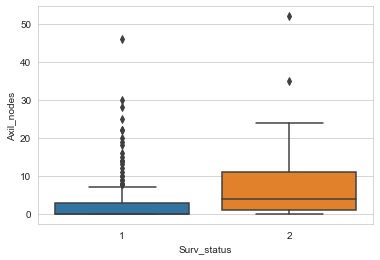

In [20]:
sns.boxplot(x='Surv_status', y='Axil_nodes', data = data)
plt.show()

#### Violin Plot

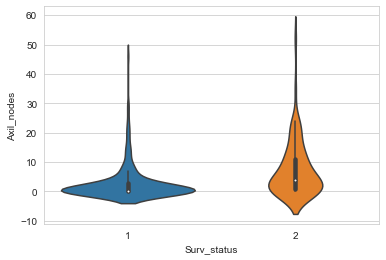

In [21]:
sns.violinplot(x='Surv_status', y='Axil_nodes', data = data)
plt.show()

#### Contour Plot

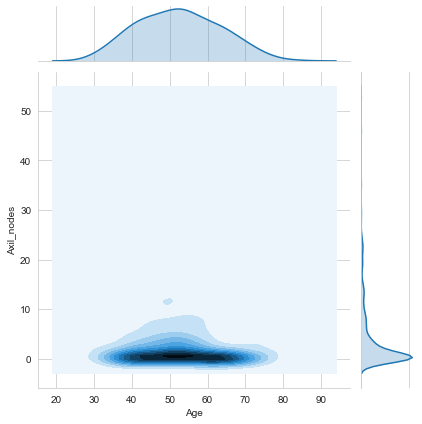

In [22]:
sns.jointplot(x='Age', y='Axil_nodes', data = data, kind='kde')
plt.grid()
plt.show()

#### Observations
1. The density of Long Survivors is more for patients with `Age` 40 to 65 with less than 3 `Axil_nodes`